# DSCI 314 - Project 6

### Emma Wachholz

In [1]:
import pandas as pd
import re
from sklearn.base import TransformerMixin
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

1.  Load the dataset of sentiment140.csv into memory.

In [2]:
col_names = ['polarity', 'id', 'date', 'query', 'user', 'text']

sent140 = pd.read_csv('sentiment140.csv', names = col_names, encoding = 'latin-1')
sent140.head(10)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


2. Clean and preprocess the texts.

In [3]:
text = sent140[["text", "polarity"]]
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   text      1600000 non-null  object
 1   polarity  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [4]:
percent_missing = text.isnull().sum() * 100 / len(text)
percent_missing

text        0.0
polarity    0.0
dtype: float64

In [5]:
text['polarity'].value_counts(normalize= True)

4    0.5
0    0.5
Name: polarity, dtype: float64

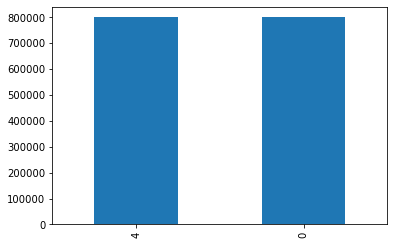

In [6]:
text.polarity.value_counts().sort_values().plot(kind = 'bar')

In [7]:
class features(TransformerMixin):
    def transform(self, X, **transform_params):
        """Override the transform method to clean text"""
        return [clean_text(text) for text in X]
    
    def fit(self, X, y= None, **fit_params):
        return self
    
    def get_params(self, deep= True):
        return {}

def clean_text(text):
    """Removing nan, @airline, punctuation, URL, or any non alpanumeric characters and converting the text into lowercase"""
    text = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())      
    return text.strip().lower()   

3. Build the first model based on pipeline using the support vector machines. 

In [8]:
le = preprocessing.LabelEncoder()
   
text['polarity']= le.fit_transform(text['polarity'])
text['polarity'].value_counts(normalize= True)

<ipython-input-8-e2baea714e68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['polarity']= le.fit_transform(text['polarity'])


1    0.5
0    0.5
Name: polarity, dtype: float64

In [9]:
X = text['text']
y = text['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(f'X_train dimension: {X_train.shape}; y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}; y_train dimension: {y_test.shape}')

X_train dimension: (1280000,); y_train dimension: (1280000,)
X_test dimension: (320000,); y_train dimension: (320000,)


In [10]:
t0 = time()

tfidf_vector = TfidfVectorizer(ngram_range = (1,1))

classifier = LogisticRegression()

pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", tfidf_vector),
                 ("classifier", classifier)])

pipeline.fit(X_train, y_train)

print(f"It takes about {time() - t0:.1f} seconds")

It takes about 65.1 seconds


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Check the first model. Is it a good model based on the selected evaluation metrics? Please justify your answer.

Confusion matrix, without normalization
[[126023  33977]
 [ 30120 129880]]
Normalized confusion matrix
[[0.78764375 0.21235625]
 [0.18825    0.81175   ]]


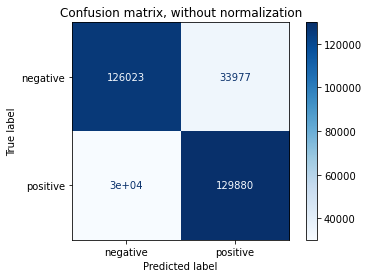

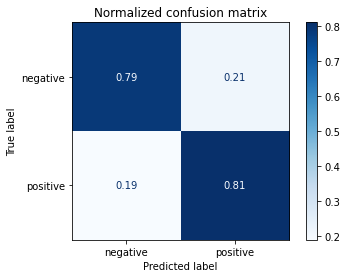

In [11]:
target_names = ['negative', 'positive']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_test, y_test,
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80    160000
    positive       0.79      0.81      0.80    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



This is a decent model, looking at the precision, recall, and f1-score. The accuracy of the model is 80%.

5. Create the second model using pipeline, grid search CV for the hyperparameters for the estimators.

In [13]:
pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", TfidfVectorizer()),
                 ("classifier", DecisionTreeClassifier())])

parameters = {
    'vectorizer__max_df': (0.5, 1.0),
    'vectorizer__ngram_range': ((1, 1), (1,2)),
    'vectorizer__use_idf': (True, False),
    'classifier__max_features': ["auto"],
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)

t0 = time()
grid_search.fit(X_train, y_train)
print(f"It takes about {time() - t0:.1f} seconds.")
print()

print(f"Best score= {grid_search.best_score_:0.3f}")
print("Best parameters set:")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name])) 

Performing grid search...
The pipeline contains: ['cleaner', 'vectorizer', 'classifier']
parameters are as follows:
{'classifier__max_features': ['auto'],
 'vectorizer__max_df': (0.5, 1.0),
 'vectorizer__ngram_range': ((1, 1), (1, 2)),
 'vectorizer__use_idf': (True, False)}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 847.2min finished


It takes about 57986.4 seconds.

Best score= 0.682
Best parameters set:
	classifier__max_features: 'auto'
	vectorizer__max_df: 0.5
	vectorizer__ngram_range: (1, 2)
	vectorizer__use_idf: False


Confusion matrix, without normalization
[[108139  51861]
 [ 50836 109164]]
Normalized confusion matrix
[[0.67586875 0.32413125]
 [0.317725   0.682275  ]]


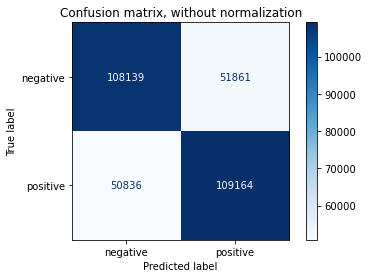

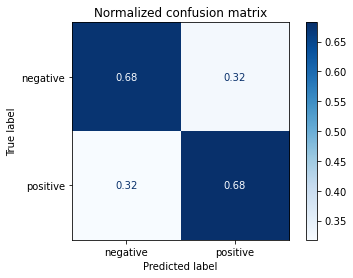

In [14]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search, X_test, y_test,
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [15]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    negative       0.68      0.68      0.68    160000
    positive       0.68      0.68      0.68    160000

    accuracy                           0.68    320000
   macro avg       0.68      0.68      0.68    320000
weighted avg       0.68      0.68      0.68    320000

